In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

df = pd.read_csv (r'C:\Users\riyak\Downloads\MZVAV-1.csv')
print (df)

                Datetime  AHU: Supply Air Temperature  \
0         1/30/2017 0:00                        68.00   
1         1/30/2017 0:01                        67.99   
2         1/30/2017 0:02                        67.99   
3         1/30/2017 0:03                        67.99   
4         1/30/2017 0:04                        67.99   
...                  ...                          ...   
272155  12/17/2017 23:55                        55.04   
272156  12/17/2017 23:56                        55.04   
272157  12/17/2017 23:57                        55.04   
272158  12/17/2017 23:58                        55.04   
272159  12/17/2017 23:59                        55.04   

        AHU: Supply Air Temperature Set Point  AHU: Outdoor Air Temperature  \
0                                       55.04                         32.00   
1                                       55.04                         32.00   
2                                       55.04                         -5.93   

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df.shape 

(272160, 18)

In [4]:
df.columns.values 

array(['Datetime', 'AHU: Supply Air Temperature',
       'AHU: Supply Air Temperature Set Point',
       'AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature',
       'AHU: Return Air Temperature', 'AHU: Supply Air Fan Status',
       'AHU: Return Air Fan Status',
       'AHU: Supply Air Fan Speed Control Signal',
       'AHU: Return Air Fan Speed Control Signal',
       'AHU: Outdoor Air Damper Control Signal  ',
       'AHU: Return Air Damper Control Signal',
       'AHU: Cooling Coil Valve Control Signal',
       'AHU: Heating Coil Valve Control Signal',
       'AHU: Supply Air Duct Static Pressure Set Point',
       'AHU: Supply Air Duct Static Pressure', 'Occupancy Mode Indicator',
       'Fault Detection Ground Truth'], dtype=object)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272160 entries, 0 to 272159
Data columns (total 18 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Datetime                                        272160 non-null  object 
 1   AHU: Supply Air Temperature                     272160 non-null  float64
 2   AHU: Supply Air Temperature Set Point           272160 non-null  float64
 3   AHU: Outdoor Air Temperature                    272160 non-null  float64
 4   AHU: Mixed Air Temperature                      272160 non-null  float64
 5   AHU: Return Air Temperature                     272160 non-null  float64
 6   AHU: Supply Air Fan Status                      272160 non-null  int64  
 7   AHU: Return Air Fan Status                      272160 non-null  int64  
 8   AHU: Supply Air Fan Speed Control Signal        272160 non-null  float64
 9   AHU: Return Air Fan Speed 

In [6]:
df.describe() 

,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
count,272160.000000,2.721600e+05,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,2.721600e+05,272160.000000,272160.000000,272160.000000
mean,53.762030,5.504000e+01,48.357590,65.000186,71.453754,0.670242,0.670242,0.480342,0.480342,0.213219,0.000009,0.043273,0.000077,4.000000e-02,0.034261,0.487654,0.857143
std,2.545891,3.741583e-10,20.154449,7.409942,3.702466,0.470126,0.470126,0.353275,0.353275,0.325107,0.004696,0.083905,0.008784,1.908546e-13,0.032849,0.499848,0.349928
min,44.950000,5.504000e+01,-14.260000,22.610000,54.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e-02,-0.020000,0.000000,0.000000
25%,52.000000,5.504000e+01,36.320000,57.030000,70.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,4.000000e-02,0.000000,0.000000,1.000000
50%,54.070000,5.504000e+01,52.340000,65.570000,72.010000,1.000000,1.000000,0.640000,0.640000,0.000000,0.000000,0.020000,0.000000,4.000000e-02,0.040000,0.000000,1.000000
75%,55.040000,5.504000e+01,62.610000,72.020000,74.260000,1.000000,1.000000,0.670000,0.670000,0.240000,0.000000,0.040000,0.000000,4.000000e-02,0.040000,1.000000,1.000000
max,72.030000,5.504000e+01,90.140000,78.720000,87.870000,1.000000,1.000000,1.000000,1.000000,1.000000,2.450000,0.600000,1.000000,4.000000e-02,0.120000,1.000000,1.000000


<AxesSubplot:>

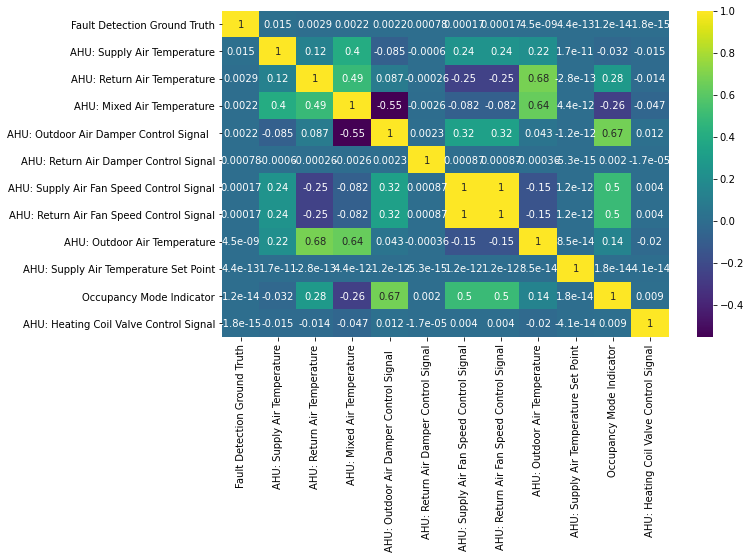

In [7]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Fault Detection Ground Truth')['Fault Detection Ground Truth'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train,test = train_test_split( 
          
    df,test_size = 0.3, random_state = 100)

In [10]:
def bar_plot(variable):
    """
    input: variable ex: sex
    output: barplot & value count
    """
    # get features
    var = df[variable]
    # count number of categorical variable (value/sample)
    varValue = var.value_counts()
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequanc")
    plt.title(variable)
    plt.show()
    
    print("{}\n{}".format(variable, varValue))

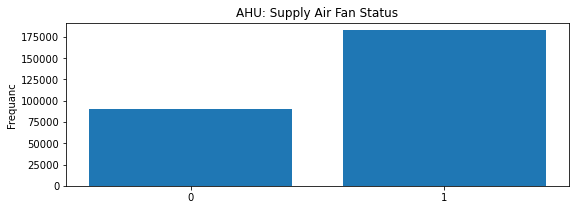

AHU: Supply Air Fan Status
1    182413
0     89747
Name: AHU: Supply Air Fan Status, dtype: int64


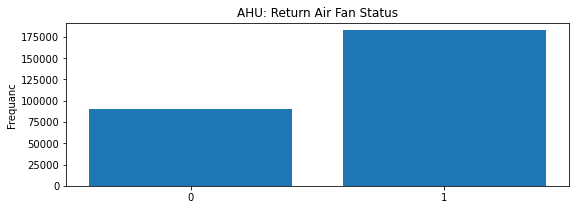

AHU: Return Air Fan Status
1    182413
0     89747
Name: AHU: Return Air Fan Status, dtype: int64


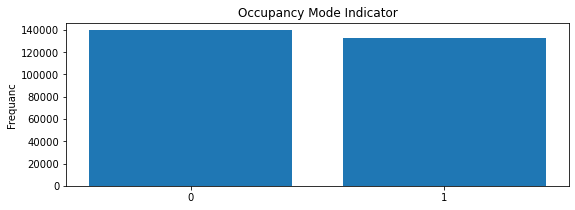

Occupancy Mode Indicator
0    139440
1    132720
Name: Occupancy Mode Indicator, dtype: int64


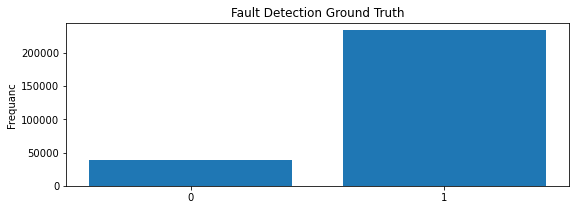

Fault Detection Ground Truth
1    233280
0     38880
Name: Fault Detection Ground Truth, dtype: int64


In [11]:
categorical = ["AHU: Supply Air Fan Status", "AHU: Return Air Fan Status", "Occupancy Mode Indicator", "Fault Detection Ground Truth"]
for c in categorical:
    bar_plot(c)

In [12]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")  # plt.style.available => if you write this you can see the other styles


import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [13]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(df[variable], bins=40)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

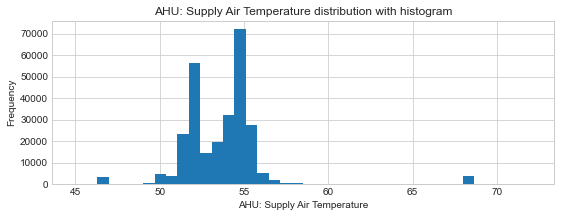

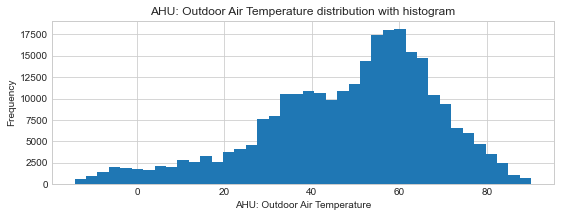

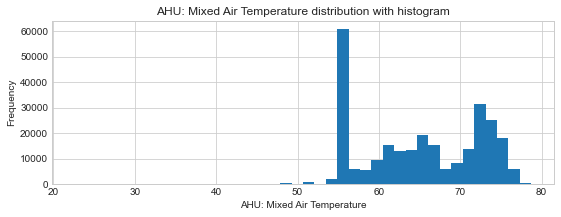

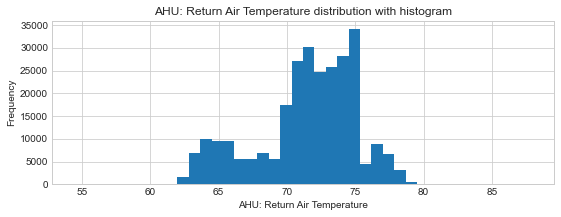

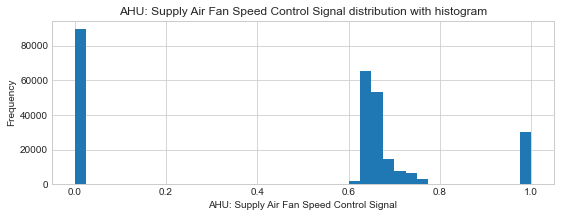

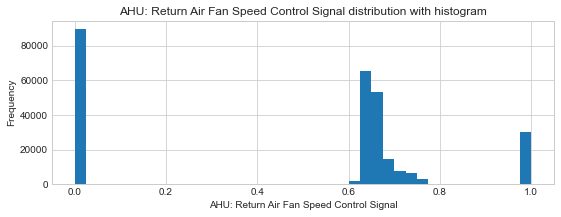

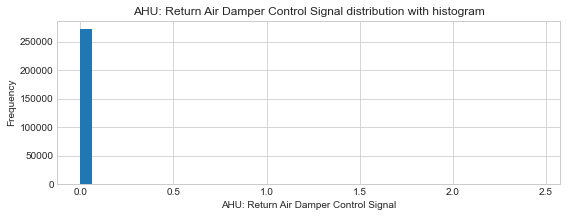

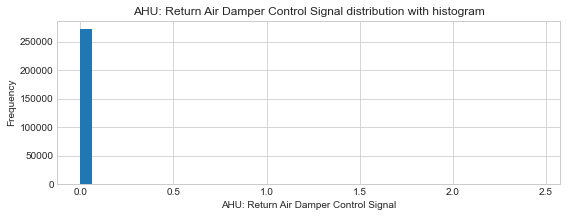

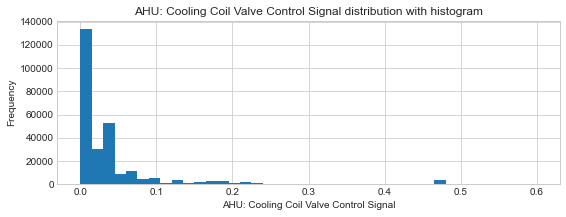

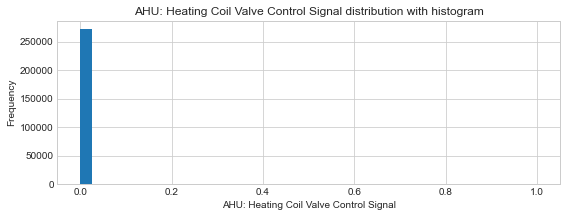

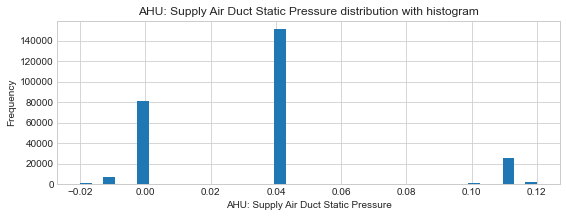

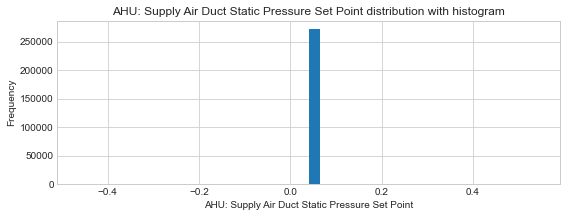

In [14]:
numericVar = ["AHU: Supply Air Temperature", "AHU: Outdoor Air Temperature", "AHU: Mixed Air Temperature", "AHU: Return Air Temperature","AHU: Supply Air Fan Speed Control Signal","AHU: Return Air Fan Speed Control Signal","AHU: Return Air Damper Control Signal","AHU: Return Air Damper Control Signal","AHU: Cooling Coil Valve Control Signal","AHU: Heating Coil Valve Control Signal","AHU: Supply Air Duct Static Pressure","AHU: Supply Air Duct Static Pressure Set Point"]
for n in numericVar:
    plot_hist(n)

In [15]:
df.columns


Index(['Datetime', 'AHU: Supply Air Temperature',
       'AHU: Supply Air Temperature Set Point', 'AHU: Outdoor Air Temperature',
       'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature',
       'AHU: Supply Air Fan Status', 'AHU: Return Air Fan Status',
       'AHU: Supply Air Fan Speed Control Signal',
       'AHU: Return Air Fan Speed Control Signal',
       'AHU: Outdoor Air Damper Control Signal  ',
       'AHU: Return Air Damper Control Signal',
       'AHU: Cooling Coil Valve Control Signal',
       'AHU: Heating Coil Valve Control Signal',
       'AHU: Supply Air Duct Static Pressure Set Point',
       'AHU: Supply Air Duct Static Pressure', 'Occupancy Mode Indicator',
       'Fault Detection Ground Truth'],
      dtype='object')

In [16]:
df[["AHU: Supply Air Temperature","Fault Detection Ground Truth"]].groupby(["AHU: Supply Air Temperature"], as_index=False).mean().sort_values(by="Fault Detection Ground Truth", ascending=False)

,AHU: Supply Air Temperature,Fault Detection Ground Truth
813,56.86,1.0
843,57.16,1.0
1041,59.37,1.0
819,56.92,1.0
1043,59.39,1.0
...,...,...
1165,62.32,0.0
1162,62.21,0.0
1161,62.18,0.0
1295,66.71,0.0


In [17]:
df.columns

Index(['Datetime', 'AHU: Supply Air Temperature',
       'AHU: Supply Air Temperature Set Point', 'AHU: Outdoor Air Temperature',
       'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature',
       'AHU: Supply Air Fan Status', 'AHU: Return Air Fan Status',
       'AHU: Supply Air Fan Speed Control Signal',
       'AHU: Return Air Fan Speed Control Signal',
       'AHU: Outdoor Air Damper Control Signal  ',
       'AHU: Return Air Damper Control Signal',
       'AHU: Cooling Coil Valve Control Signal',
       'AHU: Heating Coil Valve Control Signal',
       'AHU: Supply Air Duct Static Pressure Set Point',
       'AHU: Supply Air Duct Static Pressure', 'Occupancy Mode Indicator',
       'Fault Detection Ground Truth'],
      dtype='object')

In [18]:
def outlier_detection(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st Quantile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # Detect outlier and their indices
        outlier_indices_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        
        # store indices
        outlier_indices.extend(outlier_indices_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outlier = list(i for i, v in outlier_indices.items() if v >= 2)
    
    return multiple_outlier


In [19]:
df.loc[outlier_detection(df, ["AHU: Supply Air Temperature", "AHU: Supply Air Temperature Set Point", "AHU: Outdoor Air Temperature", "AHU: Mixed Air Temperature", "AHU: Return Air Temperature","AHU: Supply Air Fan Status","AHU: Return Air Fan Status",
       "AHU: Supply Air Fan Speed Control Signal",
       "AHU: Return Air Fan Speed Control Signal",
       "AHU: Outdoor Air Damper Control Signal  ",
       "AHU: Return Air Damper Control Signal",
       "AHU: Cooling Coil Valve Control Signal",
       "AHU: Heating Coil Valve Control Signal",
       "AHU: Supply Air Duct Static Pressure Set Point",
       "AHU: Supply Air Duct Static Pressure","Occupancy Mode Indicator",
       "Fault Detection Ground Truth"])]

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,1/30/2017 0:00,68.00,55.04,32.00,68.00,75.20,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
1,1/30/2017 0:01,67.99,55.04,32.00,66.71,75.20,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
2,1/30/2017 0:02,67.99,55.04,-5.93,66.71,74.45,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
3,1/30/2017 0:03,67.99,55.04,-5.88,66.71,74.04,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
4,1/30/2017 0:04,67.99,55.04,-5.83,66.71,73.56,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211157,11/5/2017 15:17,55.04,55.04,35.96,63.65,63.66,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,0
211158,11/5/2017 15:18,55.04,55.04,35.96,63.66,63.66,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,0
211159,11/5/2017 15:19,55.04,55.04,35.96,63.66,63.66,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,0
211160,11/5/2017 15:20,55.04,55.04,35.96,63.65,63.65,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,0


In [20]:
df = df.drop(outlier_detection(df, ["AHU: Supply Air Temperature", "AHU: Supply Air Temperature Set Point", "AHU: Outdoor Air Temperature", "AHU: Mixed Air Temperature", "AHU: Return Air Temperature","AHU: Supply Air Fan Status","AHU: Return Air Fan Status",
       "AHU: Supply Air Fan Speed Control Signal",
       "AHU: Return Air Fan Speed Control Signal",
       "AHU: Outdoor Air Damper Control Signal  ",
       "AHU: Return Air Damper Control Signal",
       "AHU: Cooling Coil Valve Control Signal",
       "AHU: Heating Coil Valve Control Signal",
       "AHU: Supply Air Duct Static Pressure Set Point",
       "AHU: Supply Air Duct Static Pressure","Occupancy Mode Indicator",
       "Fault Detection Ground Truth"]), axis=0).reset_index(drop=True)

In [21]:
df = pd.concat([df,test], axis=0).reset_index(drop=True)

In [22]:
df.head()

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,1/30/2017 8:36,51.14,55.04,-3.04,55.06,70.55,1,1,0.64,0.64,0.18,0.0,0.01,0,0.04,0.04,1,0
1,1/30/2017 8:37,51.14,55.04,-2.96,55.06,70.56,1,1,0.64,0.64,0.18,0.0,0.01,0,0.04,0.04,1,0
2,1/30/2017 8:38,51.15,55.04,-2.87,55.06,70.58,1,1,0.64,0.64,0.18,0.0,0.01,0,0.04,0.04,1,0
3,1/30/2017 8:39,51.15,55.04,-2.79,55.06,70.59,1,1,0.64,0.64,0.18,0.0,0.01,0,0.04,0.04,1,0
4,1/30/2017 8:40,51.15,55.04,-2.70,55.06,70.60,1,1,0.64,0.64,0.18,0.0,0.01,0,0.04,0.04,1,0


In [23]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [24]:
df.isnull().sum()

Datetime                                          0
AHU: Supply Air Temperature                       0
AHU: Supply Air Temperature Set Point             0
AHU: Outdoor Air Temperature                      0
AHU: Mixed Air Temperature                        0
AHU: Return Air Temperature                       0
AHU: Supply Air Fan Status                        0
AHU: Return Air Fan Status                        0
AHU: Supply Air Fan Speed Control Signal          0
AHU: Return Air Fan Speed Control Signal          0
AHU: Outdoor Air Damper Control Signal            0
AHU: Return Air Damper Control Signal             0
AHU: Cooling Coil Valve Control Signal            0
AHU: Heating Coil Valve Control Signal            0
AHU: Supply Air Duct Static Pressure Set Point    0
AHU: Supply Air Duct Static Pressure              0
Occupancy Mode Indicator                          0
Fault Detection Ground Truth                      0
dtype: int64

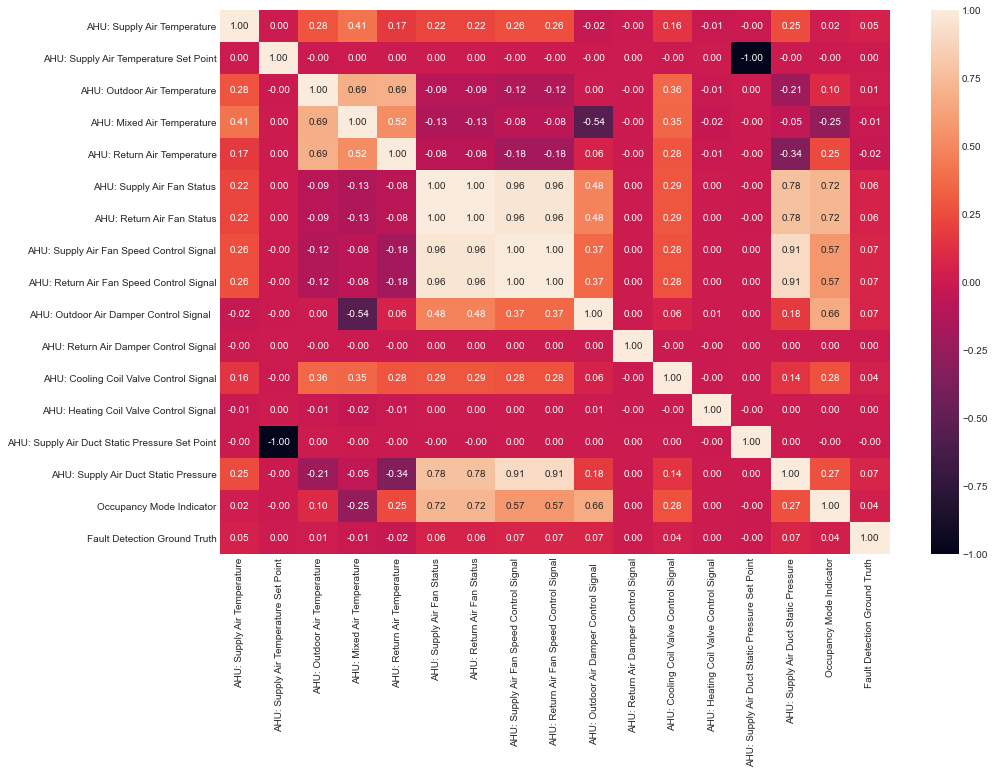

In [25]:
list1 = ["AHU: Supply Air Temperature", "AHU: Supply Air Temperature Set Point", "AHU: Outdoor Air Temperature", "AHU: Mixed Air Temperature", "AHU: Return Air Temperature","AHU: Supply Air Fan Status","AHU: Return Air Fan Status",
       "AHU: Supply Air Fan Speed Control Signal",
       "AHU: Return Air Fan Speed Control Signal",
       "AHU: Outdoor Air Damper Control Signal  ",
       "AHU: Return Air Damper Control Signal",
       "AHU: Cooling Coil Valve Control Signal",
       "AHU: Heating Coil Valve Control Signal",
       "AHU: Supply Air Duct Static Pressure Set Point",
       "AHU: Supply Air Duct Static Pressure","Occupancy Mode Indicator",
       "Fault Detection Ground Truth"]
plt.figure(figsize=(15,10))
sns.heatmap(df[list1].corr(), annot=True, fmt=".2f")
plt.show()

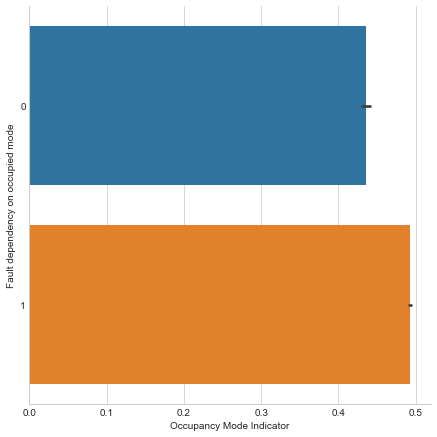

In [26]:
g = sns.factorplot(x="Occupancy Mode Indicator", y="Fault Detection Ground Truth", data=df, kind="bar", size=6, orient="h")
g.set_ylabels("Fault dependency on occupied mode")
plt.show()

In [27]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [28]:
test=test.drop(["Datetime"],axis=1)
train=train.drop(["Datetime"],axis=1)

In [29]:
test_x = test.drop(["Fault Detection Ground Truth"], axis=1)
test_y = test["Fault Detection Ground Truth"]

In [30]:
X_train = train.drop(["Fault Detection Ground Truth"] , axis=1)
Y_train = train["Fault Detection Ground Truth"]
x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train, test_size=0.3, random_state=42)
print("x_train len:", len(x_train))
print("x_test len:", len(x_test))
print("y_train len:", len(y_train))
print("y_test len:", len(y_test))
print("test len:", len(test))

x_train len: 133358
x_test len: 57154
y_train len: 133358
y_test len: 57154
test len: 81648


In [31]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_head = lr.predict(x_test)
acc_log_train = round(lr.score(x_train, y_train)*100,2)
acc_log_test = round(lr.score(x_test,y_test)*100,2)
print("Logistic Regression Train Accuracy: %", acc_log_train)
print("Logistic Regression Test Accuracy: %", acc_log_test)

Logistic Regression Train Accuracy: % 85.74
Logistic Regression Test Accuracy: % 85.65


In [36]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state=random_state),
             SVC(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split":range(10,500,20),
                "max_depth":range(1,20,2)}

svc_param_grid = {"kernel":["rbf"],
                 "gamma":[0.001,0.01,0.1,1],
                 "C":[1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features":[1.3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

lr_param_grid = {"C":np.logspace(-3,3,7),
                "penalty":["l1","l2"]}

knn_param_grid = {"n_neighbors":np.linspace(1,19,10, dtype=int).tolist(),
                 "weights":["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   lr_param_grid,
                   knn_param_grid]

In [ ]:
"""""model_names=["DecisionTree :", "SVC : ", "RandomForest : ", "LogisticRegression : ", "KNN : "]
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv=StratifiedKFold(n_splits=10), scoring="accuracy", n_jobs=-1, verbose=1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(model_names[i], cv_result[i])"""""""

In [ ]:
"""""print(cv_result)
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVC", "RandomForestClassifier", "LogisticRegression", "KNeigborsClassifier"]})

g = sns.barplot(x="Cross Validation Means", y = "ML Models", data=cv_results)
g.set_xlabel("Means Accuracy")
g.set_title("Cross Validation Scores")
plt.show()
votingC = VotingClassifier(estimators=[("rf", best_estimators[2]),
                                      ("lr", best_estimators[3])],
                          voting="soft", n_jobs=-1)
votingC = votingC.fit(x_train, y_train)
print("Accuracy :", accuracy_score(votingC.predict(x_test), y_test))""""""

Text(0, 0.5, 'Probability of Fault')

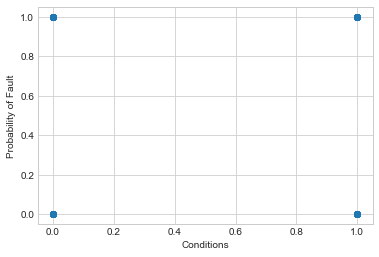

In [56]:
#y_true= x_train[0:57154]
plt.scatter(x_train.loc[:,"Occupancy Mode Indicator"],y_train)
plt.xlabel("Conditions")
plt.ylabel("Probability of Fault")

In [53]:

len(x_train)



133358